<img title="a title" alt="Alt text" src="./images/iris_petal_sepal.png">

### In this task, the goal is to categorize iris flowers into three distinct species (Setosa, Versicolor, and Virginica) based on the dimensions of their sepals and petals, including both length and width.

# Import the libraries

In [115]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Importing the IRIS Dataset

In [116]:
df=pd.read_csv('./Iris.csv')

# Exploring the dataset and performing cleaning and preprocessing

In [117]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [118]:
df.shape

(150, 6)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [121]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [122]:
df.drop('Id',inplace=True,axis='columns')

In [123]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# VISUALIZATION

<Axes: title={'center': 'Sepal Dimensions'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

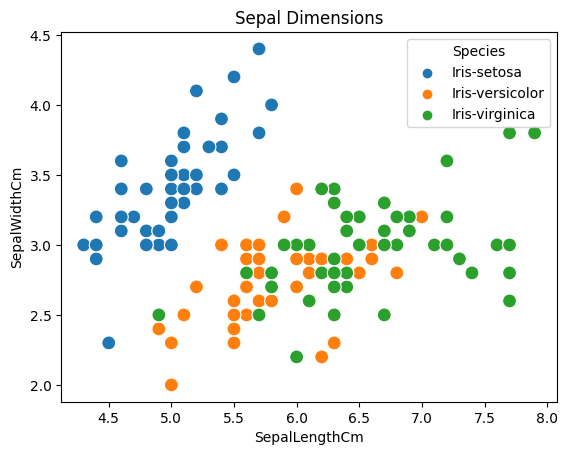

In [124]:
plt.title('Sepal Dimensions')
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',s=100,hue='Species')

<Axes: title={'center': 'Petal Dimensions'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

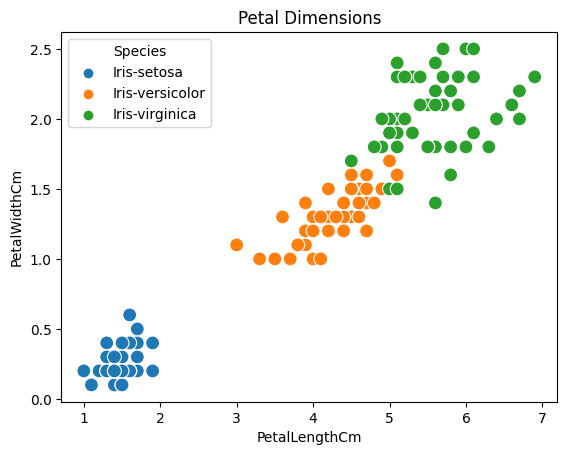

In [125]:
plt.title('Petal Dimensions')
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',s=100,hue='Species')

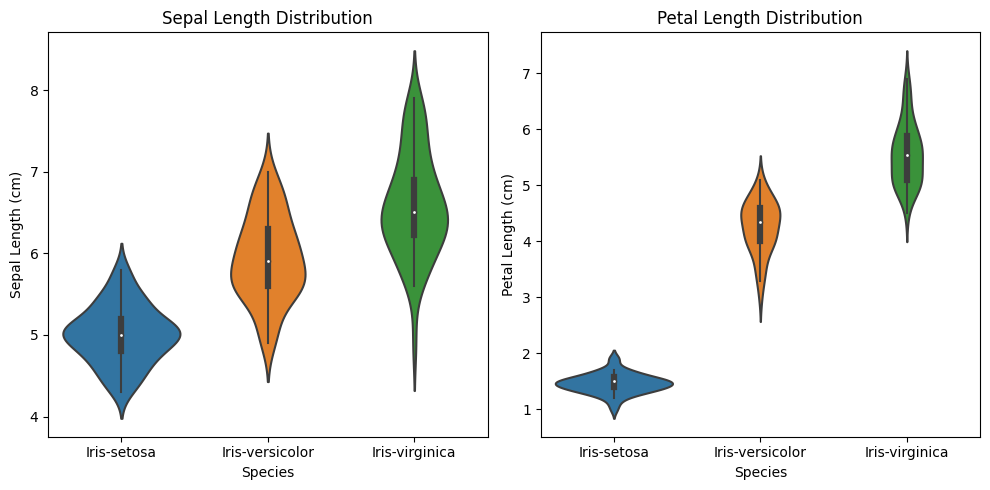

In [126]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='Species', y='SepalLengthCm', data=df,)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x='Species', y='PetalLengthCm', data=df,)
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Length Distribution')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

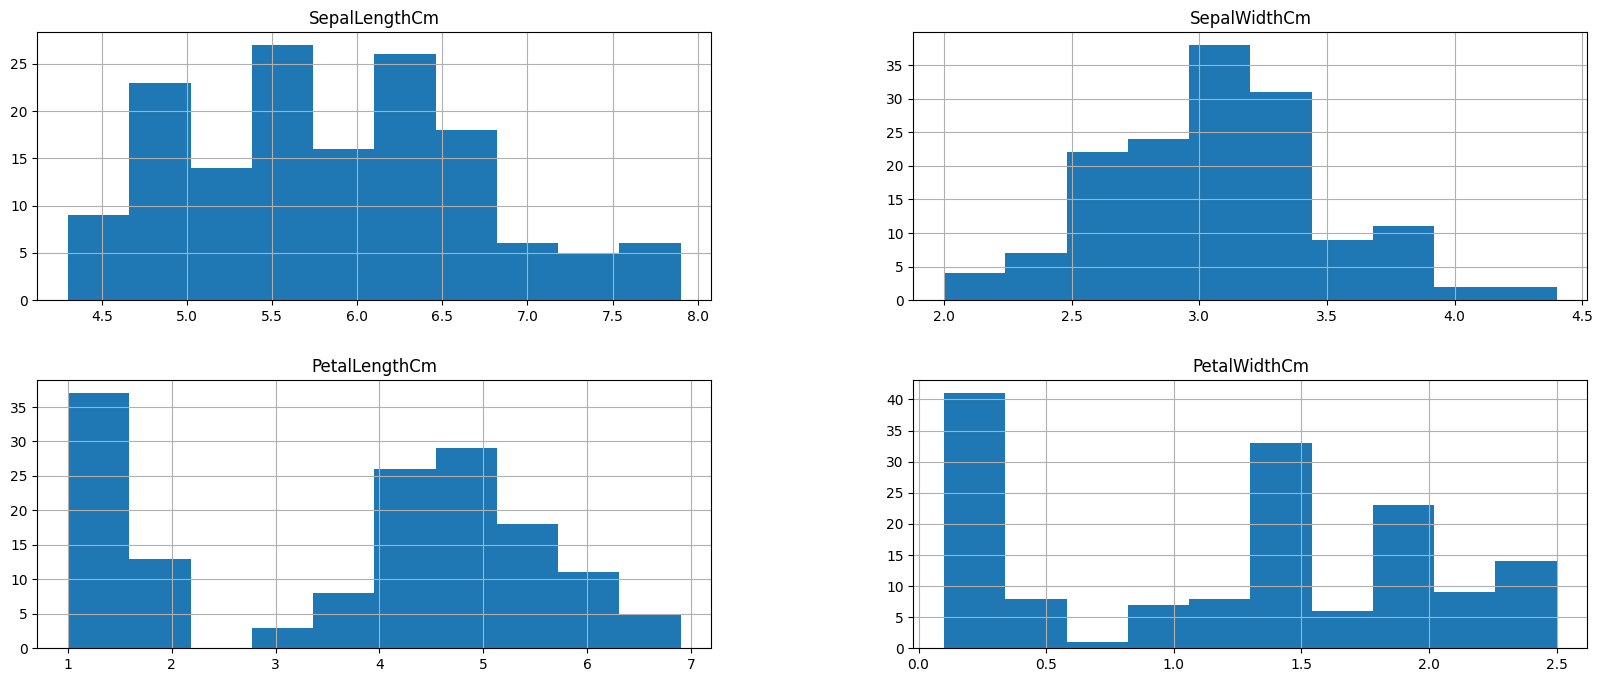

In [127]:
df.hist(figsize=(20,8))

/home/surendar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


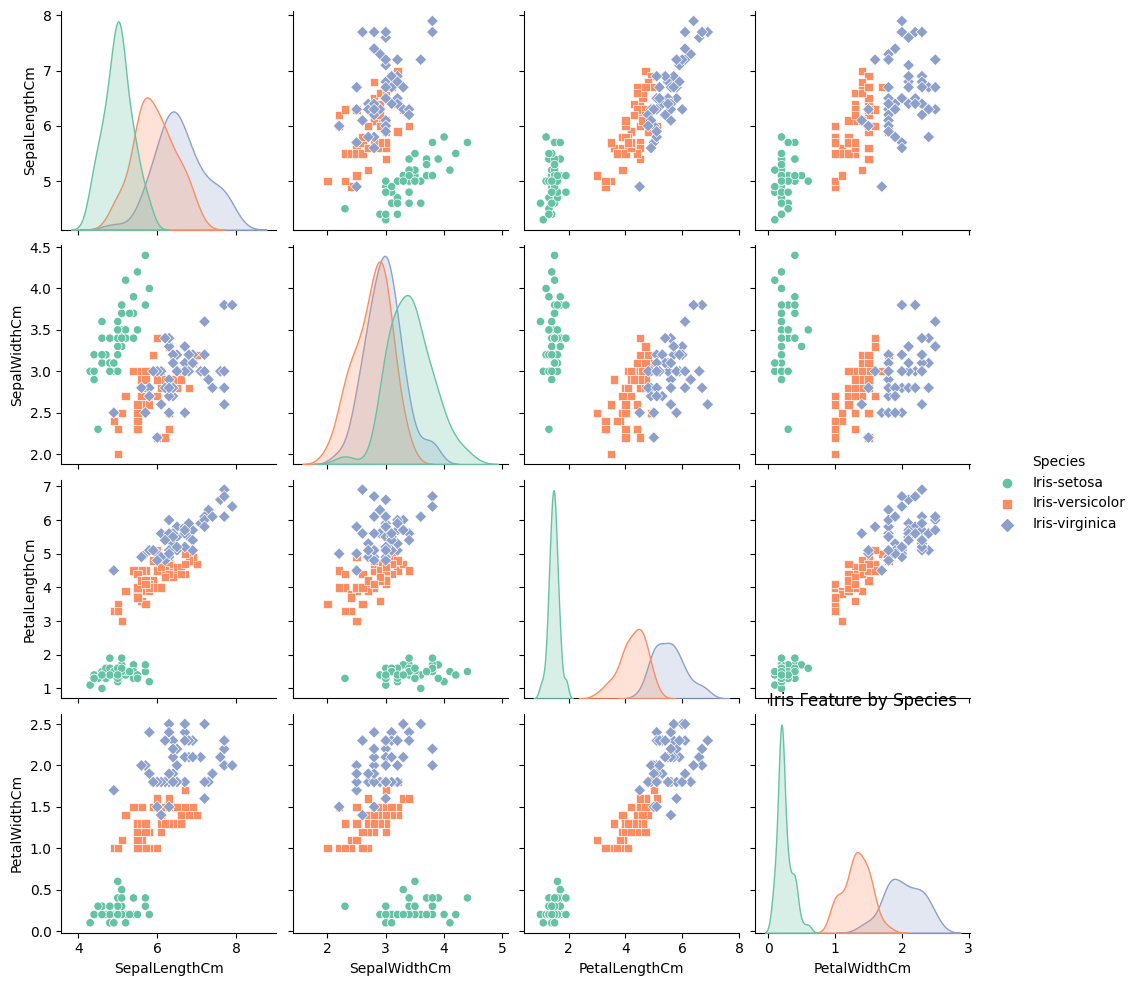

In [128]:
sns.pairplot(df,hue='Species',markers=['o','s','D'],palette='Set2')
plt.title('Iris Feature by Species')
plt.show()

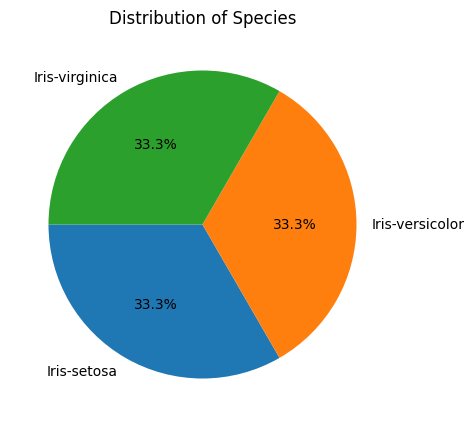

In [129]:
species_count=df['Species'].value_counts()
species_count.index

plt.figure(figsize=(5,5))
plt.pie(x=species_count.values,labels=species_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Distribution of Species')
plt.show()

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

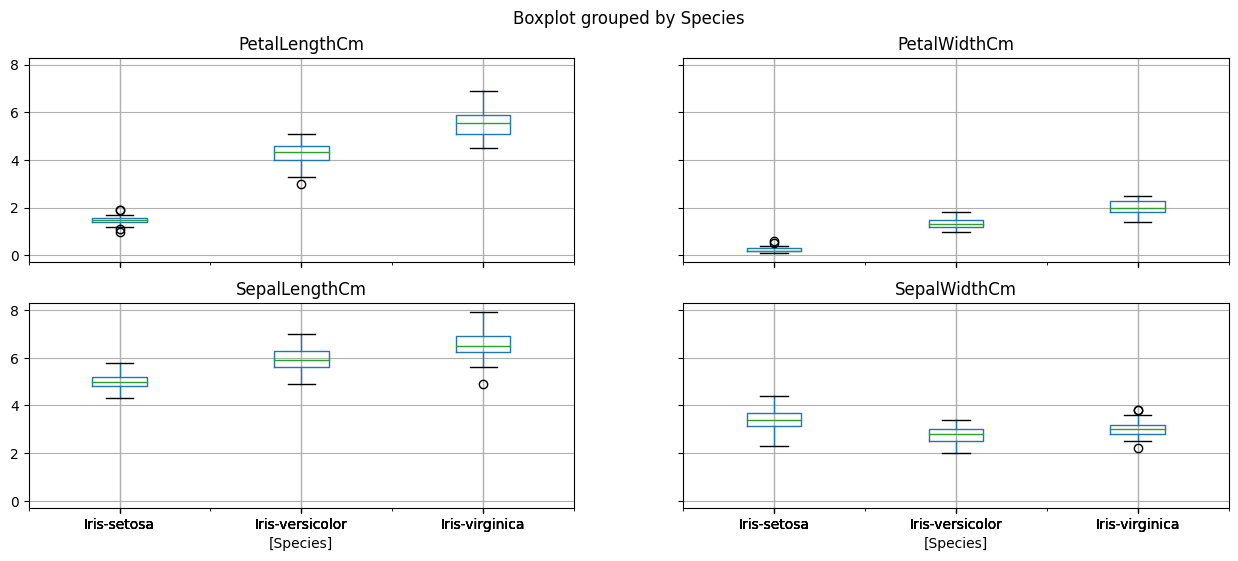

In [130]:
df.boxplot(by='Species',figsize=(15,6))

### Splitting the data into training and testing

In [131]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['target']=label_encoder.fit_transform(df['Species'])

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
data=df.values
x=data[:,0:4]
y=data[:,4]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [135]:
X_train.shape

(120, 4)

In [136]:
X_test.shape

(30, 4)

In [137]:
y_train.shape

(120,)

In [138]:
y_test.shape

(30,)

### Implementing Iris classification using various machine learning algorithms.

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

1.0

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_accuracy

1.0

In [142]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_accuracy

1.0

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy


1.0

In [144]:
y_pred = rf_classifier.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [145]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### Confusion matrix and heatmap

In [146]:
from sklearn.metrics import confusion_matrix,classification_report

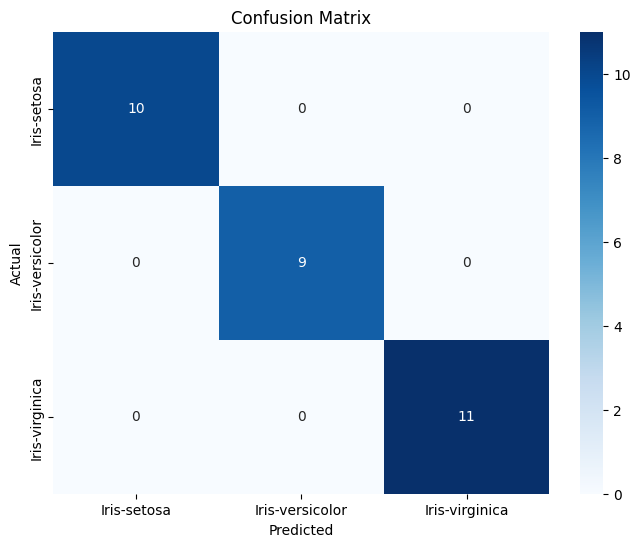

In [147]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [148]:
cls_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
cls_report_df=pd.DataFrame(cls_report).T
cls_report_df

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,10.0
Iris-versicolor,1.0,1.0,1.0,9.0
Iris-virginica,1.0,1.0,1.0,11.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0
